In [1]:
using Plots
using TensorCrossInterpolation, LinearAlgebra
using QuanticsTCI
using QuanticsGrids
using ITensorMPS
using ITensors
using TCIITensorConversion
include("src/differential_mpo.jl")

get_c_vec (generic function with 1 method)

In [ ]:
R = 10
max_bond = 10

a = 1e-2
dx = 1/ (2^R-1)

function f_func(x,y)
    return a * sin(2π * x) * cos(2π * y) # exp(-(((x/a)^2/2) + ((y/a)^2)/2))
end

function dfdx_func(x,y)
    return a * 2π / 5 * cos(2π / 5 * x) * cos(2π / 5 * y) # exp(-(((x/a)^2/2) + ((y/a)^2)/2)) * -(x/a)
end

dfdx_func (generic function with 1 method)

In [3]:
# QuanticsTCI
qgrid = DiscretizedGrid{2}(R, (xmin, ymin), (xmax, ymax); includeendpoint = true)
fq, ranksf, errorsf = quanticscrossinterpolate(Float64, f_func, qgrid; maxbonddim=max_bond)
dfdxq, ranksdfdx, errorsdfdx = quanticscrossinterpolate(Float64, dfdx_func, qgrid; maxbonddim=max_bond)

# Convert to MPS Format
s = siteinds("Qudit", R, dim=4)
f = ITensorMPS.MPS(TensorTrain(fq.tci), sites=s)
dfdx = ITensorMPS.MPS(TensorTrain(dfdxq.tci), sites=s)

# Build Diff MPOs
d1 = [Diff_1_8_x(dx, s), Diff_1_8_y(dy, s)]
d2 = [Diff_2_8_x(dx, s), Diff_2_8_y(dy, s)]
del = MPO([delta(s[i], s[i]', s[i]'') for i in 1:length(s)])
print("Done!")

Done!

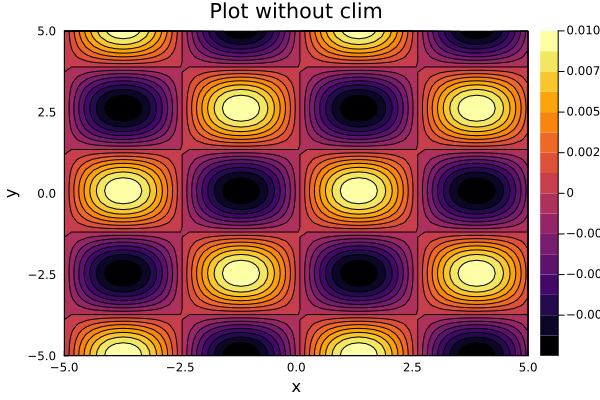

In [4]:
plot_mps(f, R, 6, xmin, xmax, ymin, ymax)

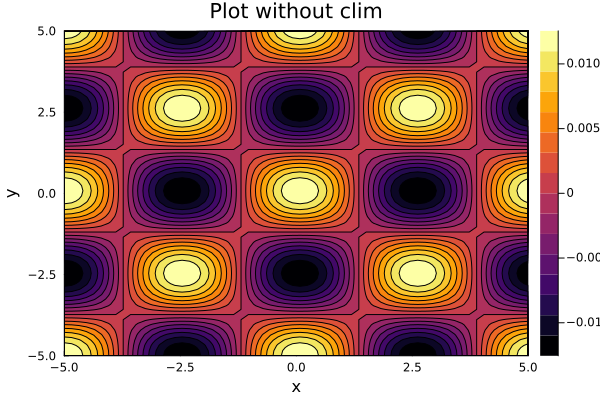

In [5]:
mps = apply(d1[1], f; alg="naive", maxdim=max_bond)
plot_mps(mps, R, 6, xmin, xmax, ymin, ymax)

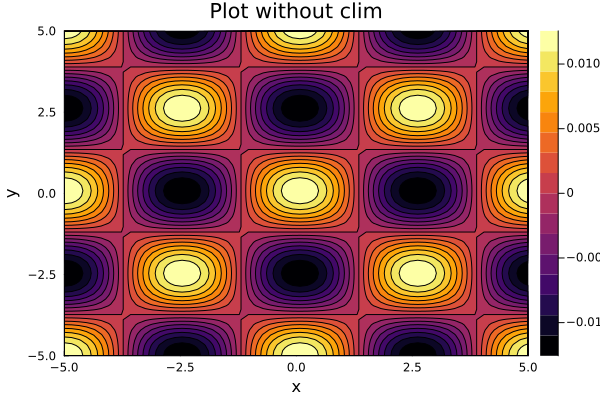

In [6]:
plot_mps(dfdx, R, 6, xmin, xmax, ymin, ymax)

In [7]:
mps = copy(f)
i = 0

0

Diff 1


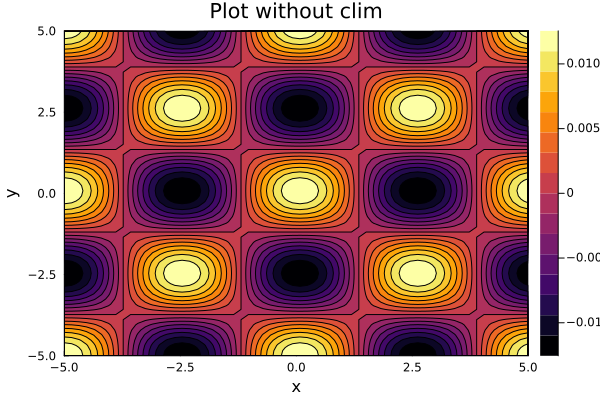

In [8]:
mps = apply(d1[1], mps; alg="naive", maxdim=max_bond)
i+=1
println("Diff $i")
plot_mps(mps, R, 6, xmin, xmax, ymin, ymax)